In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mean_absolute_error(predictions, targets):
    mae = np.mean(np.abs(np.subtract(predictions, targets)))
    return mae

In [4]:
def plot_function_prediction(train_patterns, train_targets, test_patterns, predictions, title):
    plt.plot(train_patterns, train_targets, label="function")
    plt.plot(test_patterns, predictions, label="prediction")
    plt.legend()
    plt.title(title)
    plt.show()

In [5]:
def plot_error_curve(x, errors, xlabel, ylabel, title):
    plt.plot(x, errors)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Assignment - Part I

In [6]:
class RBFNetwork:
    
    def __init__(self, num_hidden_nodes=13, sigma = 0.7, learning_rate=0.05, centers=[]):
        self.hidden_nodes = num_hidden_nodes
        self.w = np.random.normal(0, 1, (num_hidden_nodes, 1))
        
        if len(centers) == 0:
            self.centers = np.linspace(0, 2*np.pi, num_hidden_nodes)
        else:
            self.centers = centers
        #self.sigma = 1/np.sqrt(2*num_hidden_nodes)
        self.sigma = sigma
        self.lr = learning_rate
        
    def transfer_function(self, data):
        phi = np.zeros((len(data), self.hidden_nodes))
        for i in range(len(self.centers)):
            phi[:, i] = np.exp(-(data - self.centers[i])**2 / (2 * self.sigma ** 2))
                
        return phi
        
    def train_least_squares(self, data, targets):
        phi = self.transfer_function(data)
        self.w = np.linalg.solve(phi.T @ phi, phi.T @ targets)
        
    def train_delta_rule(self, data, target):
        phi = np.zeros((len(self.centers), 1))
        for i in range(len(self.centers)):
            phi[i,:] = np.exp(-(data - self.centers[i])**2 / (2 * self.sigma ** 2))
        prediction = self.predict_regression([data])[0][0]
        error = target - prediction
        self.w += self.lr * error * phi
        
        
    def competitive_learning(self, data, epochs=1000, avoid_dead_units=False):
        for i in range(epochs):
            point = data[np.random.randint(0, len(data))]
            distance = np.abs(point - self.centers)
            winner = np.argmin(distance)
            self.centers[winner] += self.lr * (point - self.centers[winner])
            if avoid_dead_units:
                winners = np.argsort(distance, axis=0)
                for winner in winners[:k]:
                    self.centers[winner] += self.lr*(point - self.centers[winner])
        
    def delta_sequential(self, data, target, epochs = 200):
        #shuffle
        idx = [i for i in range(len(data))]
        np.random.shuffle(idx)
        phi = np.zeros((len(self.centers), 1))
        
        
        for epoch in range(epochs):
            for x in idx:
                phi = np.exp(-(data[x] - self.centers)**2 / (2 * self.sigma ** 2))
                #print(phi.shape)
                phi_x = data[x]*phi
                prediction = np.dot(phi_x, self.w)
                error = target[x] - prediction
                update = self.lr * error*phi
                update = update.reshape(-1,1)
                self.w += update
        #return prediction
        
    def predict_regression(self, data):
        phi = self.transfer_function(data)
        return phi @ self.w
    
    def predict_classify(self, data):
        phi = self.transfer_function(data)
        result = phi @ self.w
        result = [1 if x >= 0 else -1 for x in result]
        return result

In [7]:
train_patterns = np.arange(0, 2*np.pi, 0.1)
test_patterns = np.arange(0.05, 2*np.pi, 0.1)

## 3.1 Batch mode training using least squares - supervised learning of network weights

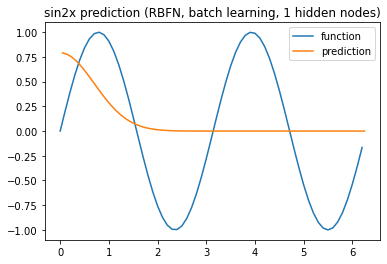

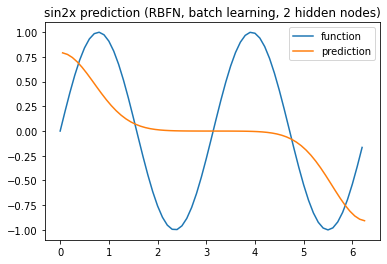

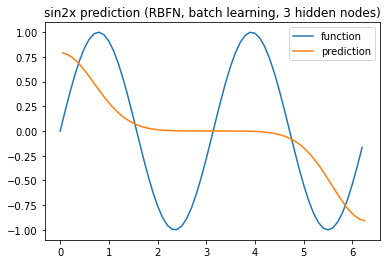

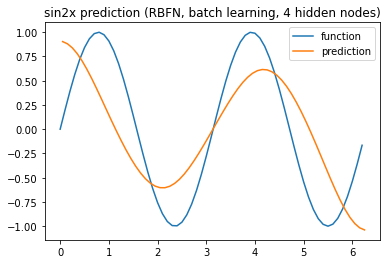

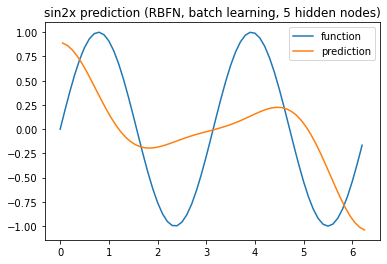

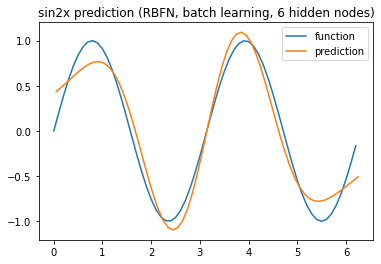

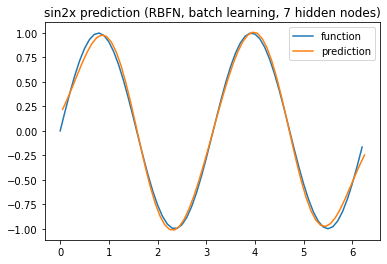

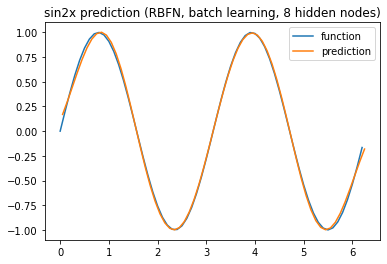

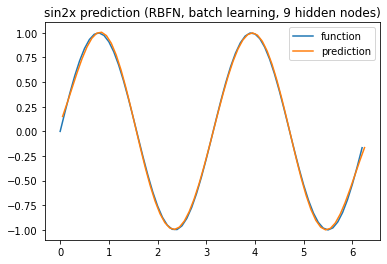

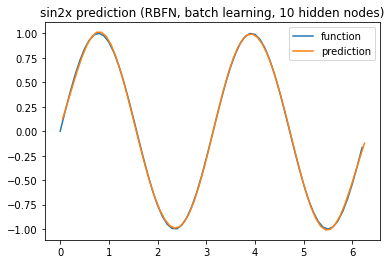

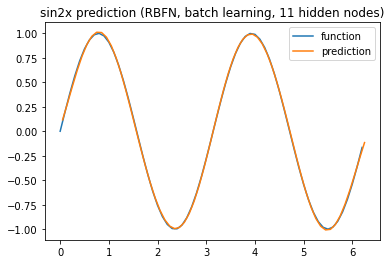

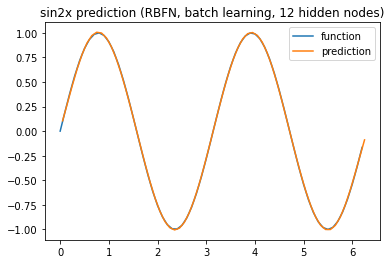

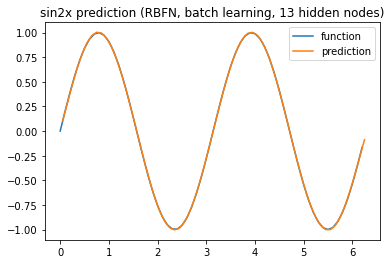

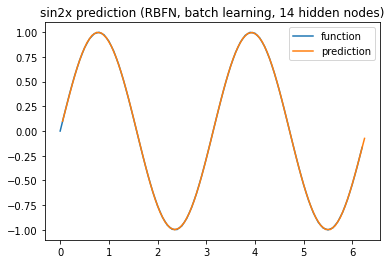

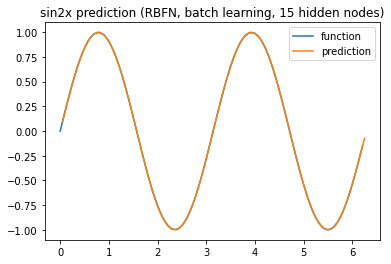

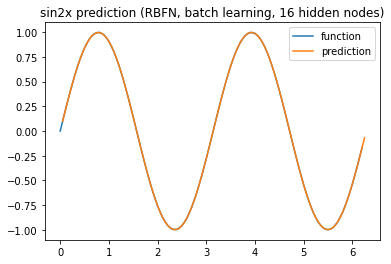

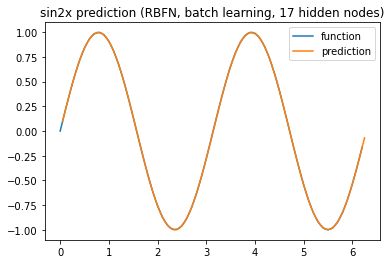

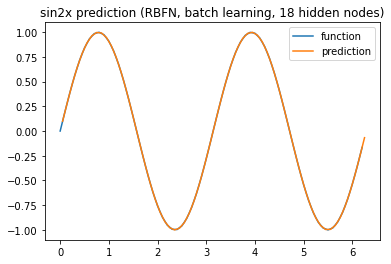

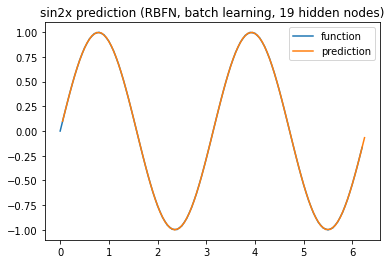

[0.5777007316478704, 0.5207785443332517, 0.5207684500630843, 0.4087192628748824, 0.5162738314757234, 0.13601950720630349, 0.04217526805489056, 0.020420579341987447, 0.018525276143815644, 0.01090322575225427, 0.009096199016472836, 0.004302989579029232, 0.003547451771077217, 0.0014020692603620986, 0.001168634168498825, 0.0003986178664451547, 0.00033944433667173145, 9.59888710543221e-05, 8.154710781616439e-05]


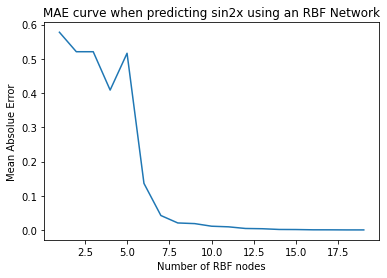

In [95]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns] 

errors = []
hidden_nodes = [i for i in range(1,20)]
for i in hidden_nodes:
    model = RBFNetwork(i)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_regression(test_patterns)
    errors += [mean_absolute_error(prediction, test_targets)]
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, batch learning, " + str(i) + " hidden nodes)")
    
print(errors)
plot_error_curve(hidden_nodes, errors, "Number of RBF nodes", "Mean Absolue Error", "MAE curve when predicting sin2x using an RBF Network")

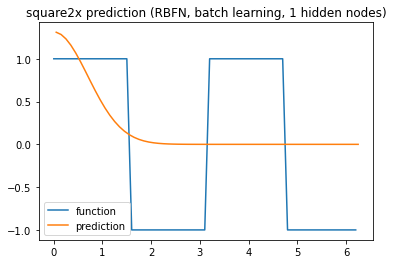

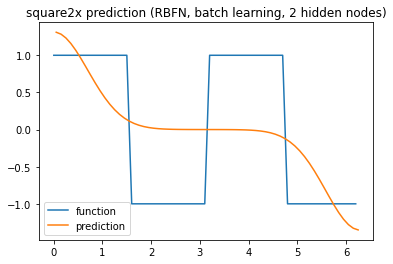

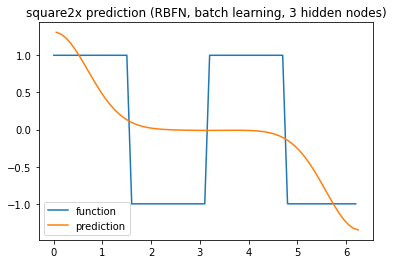

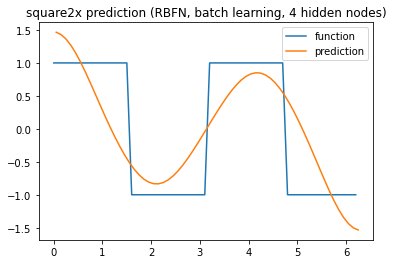

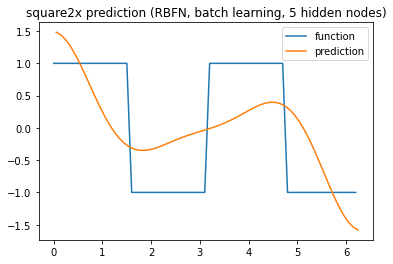

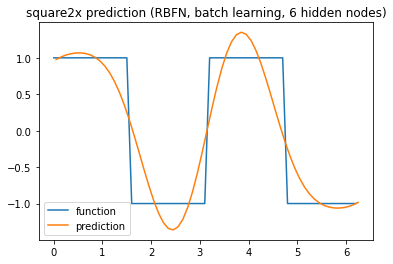

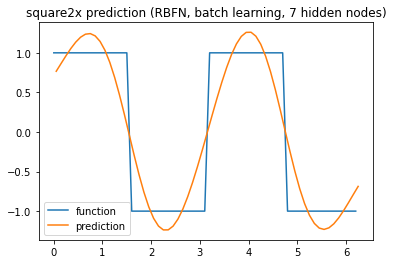

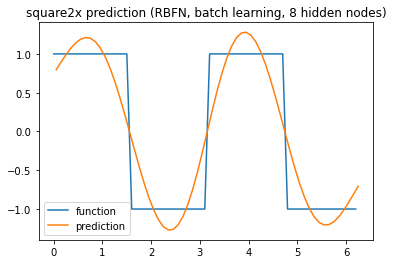

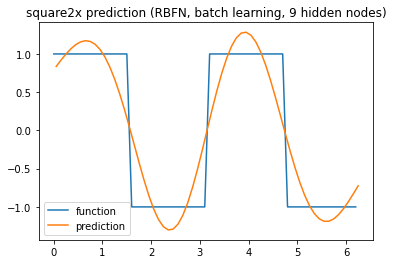

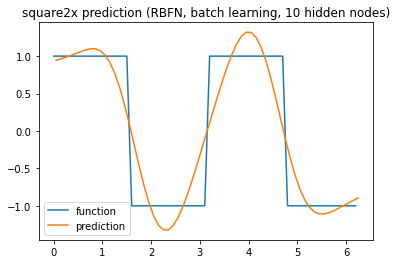

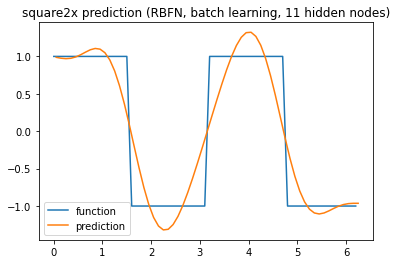

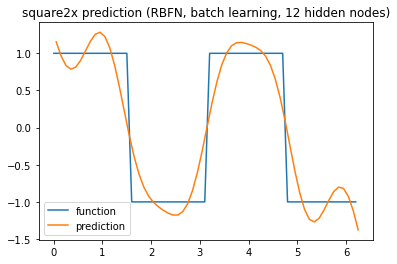

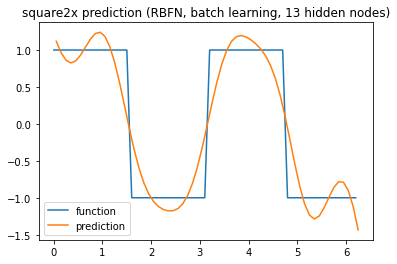

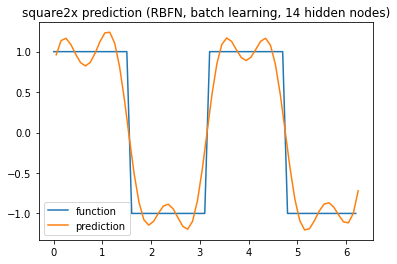

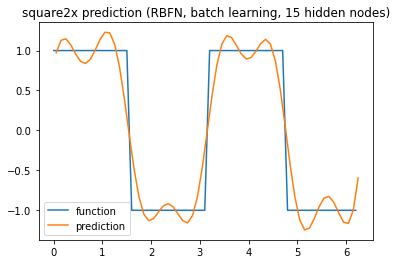

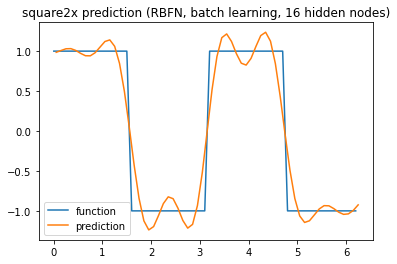

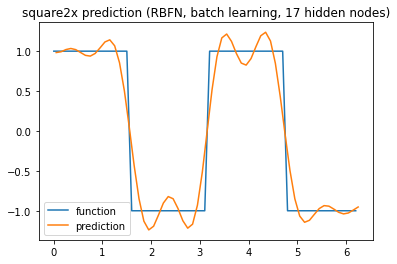

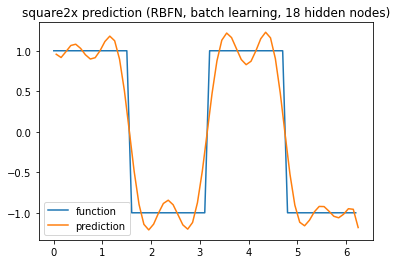

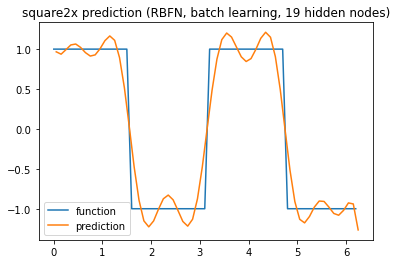

[0.85863705770239, 0.7166959244535079, 0.7168472645733124, 0.5232675946608338, 0.708586430967501, 0.28332248394891907, 0.2988688289198339, 0.2964300299023585, 0.29277607978460574, 0.2682768599510749, 0.2599034026708993, 0.25824335677400345, 0.2665884353698317, 0.19828919661987518, 0.20296872904219945, 0.17929547822142744, 0.1778384955380279, 0.1813803599238926, 0.18261910468367656]


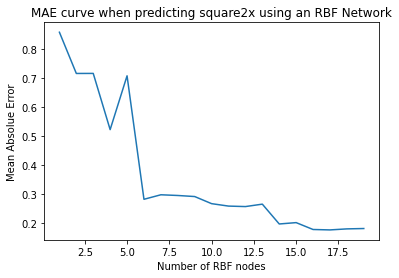

In [8]:
train_targets = [1 if np.sin(2*x) >= 0 else -1 for x in train_patterns]
test_targets = [1 if np.sin(2*x) >= 0 else -1 for x in test_patterns]

errors = []
hidden_nodes = [i for i in range(1,20)]
for i in hidden_nodes:
    model = RBFNetwork(i)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_regression(test_patterns)
    errors += [mean_absolute_error(prediction, test_targets)]
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "square2x prediction (RBFN, batch learning, " + str(i) + " hidden nodes)")

print(errors)
plot_error_curve(hidden_nodes, errors, "Number of RBF nodes", "Mean Absolue Error", "MAE curve when predicting square2x using an RBF Network")

Transformation is y = sign(x)

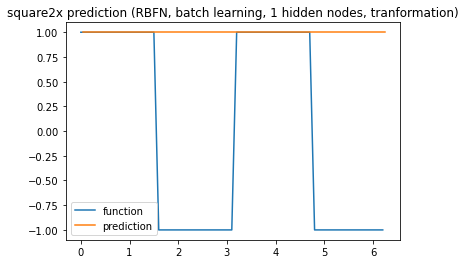

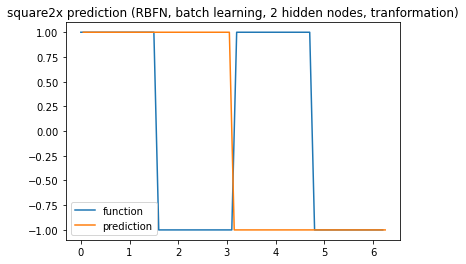

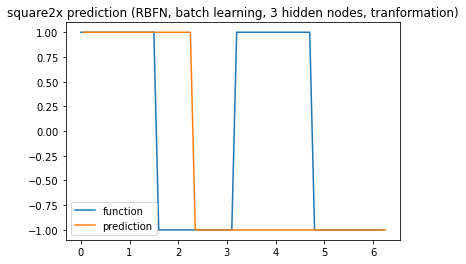

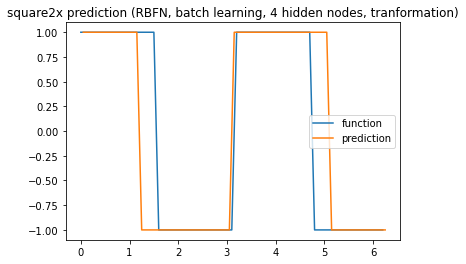

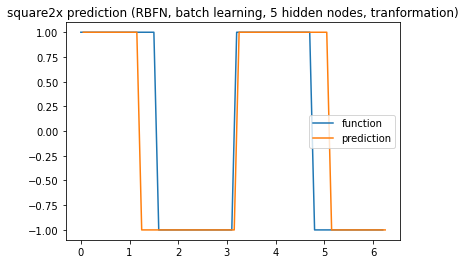

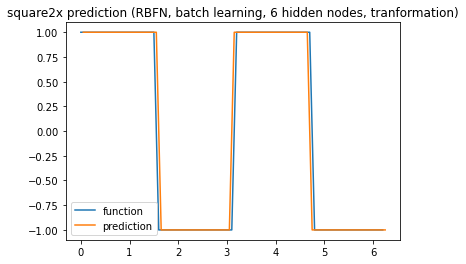

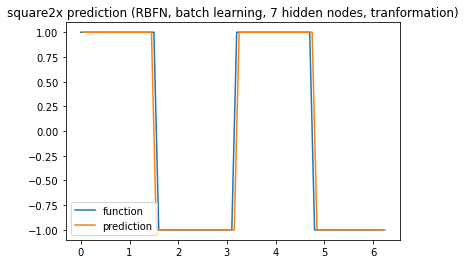

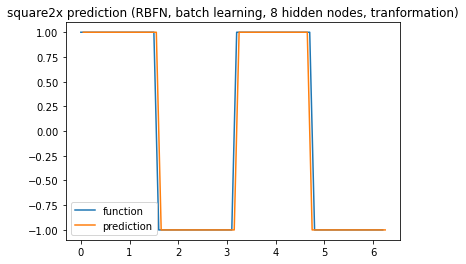

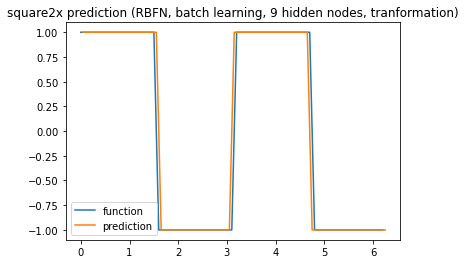

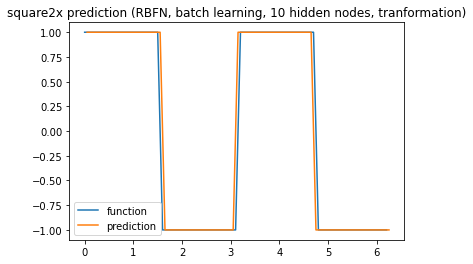

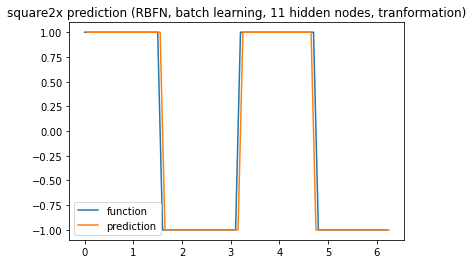

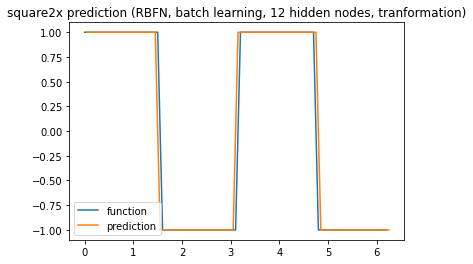

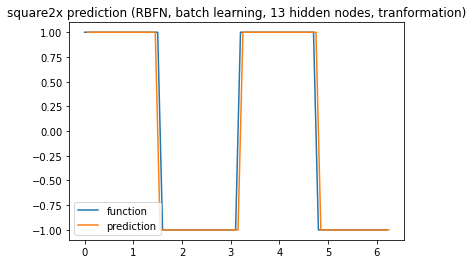

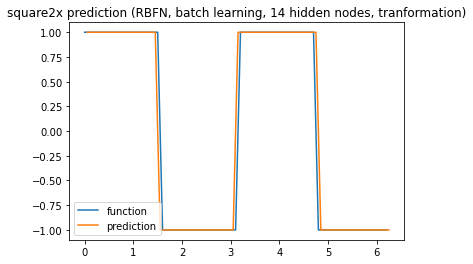

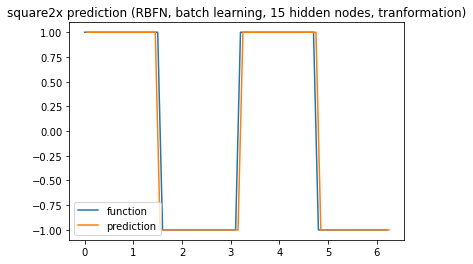

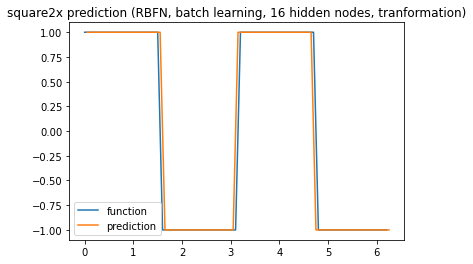

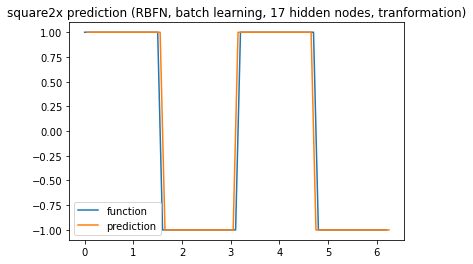

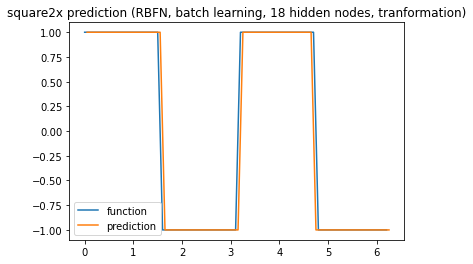

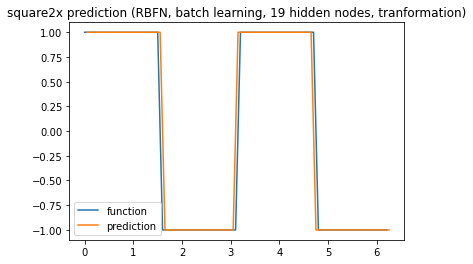

[1.0158730158730158, 0.9523809523809523, 0.6984126984126984, 0.2857142857142857, 0.25396825396825395, 0.031746031746031744, 0.06349206349206349, 0.0, 0.031746031746031744, 0.031746031746031744, 0.0, 0.09523809523809523, 0.06349206349206349, 0.09523809523809523, 0.06349206349206349, 0.031746031746031744, 0.031746031746031744, 0.0, 0.031746031746031744]


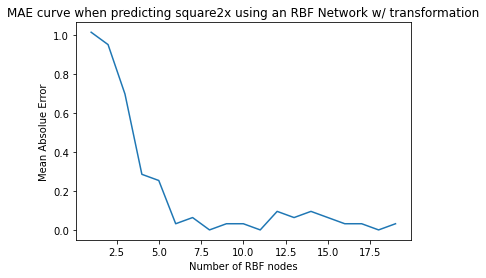

In [9]:
train_targets = [1 if np.sin(2*x) >= 0 else -1 for x in train_patterns]
test_targets = [1 if np.sin(2*x) >= 0 else -1 for x in test_patterns]

test_patterns_transformed = [x-0.01 for x in test_patterns]
test_targets_transformed = [1 if np.sin(2*(x)) >= 0 else -1 for x in test_patterns_transformed]

errors = []
hidden_nodes = [i for i in range(1,20)]
for i in hidden_nodes:
    model = RBFNetwork(i)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_classify(test_patterns)
    errors += [mean_absolute_error(prediction, test_targets_transformed)]
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "square2x prediction (RBFN, batch learning, " + str(i) + " hidden nodes, tranformation)")

print(errors)
plot_error_curve(hidden_nodes, errors, "Number of RBF nodes", "Mean Absolue Error", "MAE curve when predicting square2x using an RBF Network w/ transformation")

## 3.2 Regression with noise

**Compare the effect of the number of RBF units and their width for the two learning approaches. Which error estimate should you choose as the criterion for thse comparative analyses**

In [12]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

hidden_nodes = [i for i in range(1,15)]
sigma = [0.1, 0.3, 0.5, 0.7, 1]
mean_errors = np.zeros((len(hidden_nodes), len(sigma)))
print(mean_errors.shape)
for i in hidden_nodes:
    errors = []
    for s_idx, s in enumerate(sigma):
        for ii in range(50):
            model = RBFNetwork(i, s, 0.005)

            # Train for 50 epochs, shuffle
            idxs = [j for j in range(len(train_patterns))]
            for j in range(50):
                np.random.shuffle(idxs)
                for k in idxs:
                    model.train_delta_rule(train_patterns[k], train_targets[k])

            prediction = model.predict_regression(test_patterns)
            prediction = prediction.reshape(1,-1)[0]
            errors += [mean_absolute_error(prediction, test_targets)]
    
        #plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, " + str(i) + " hidden nodes, sigma " +str(s) +")")
        mean_errors[i-1,s_idx] = np.mean(errors)
best_performer = np.argmin(mean_errors)
print(best_performer)
#plot_error_curve(hidden_nodes, mean_errors, "Number of RBF nodes", "Mean Absolue Error", "MAE curve when predicting sin2x using an RBF Network, sigma " +str(s))

(14, 5)
63


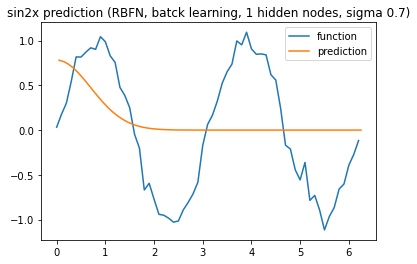

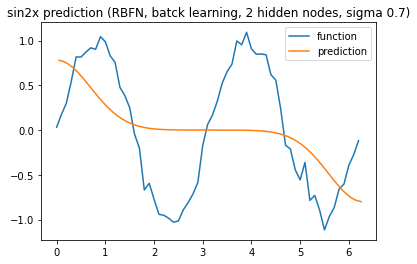

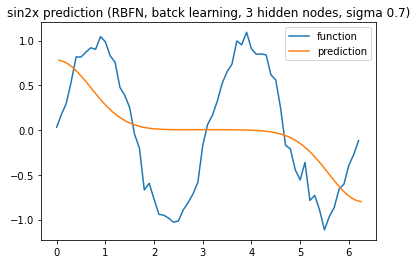

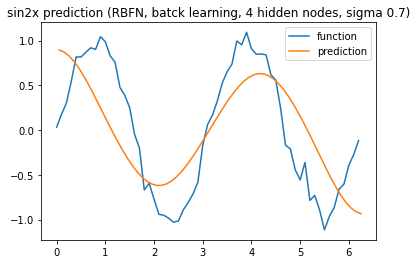

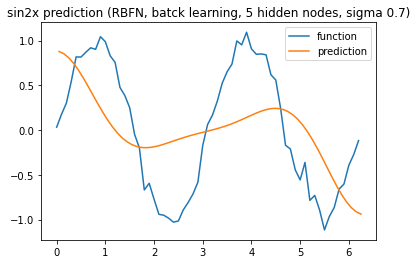

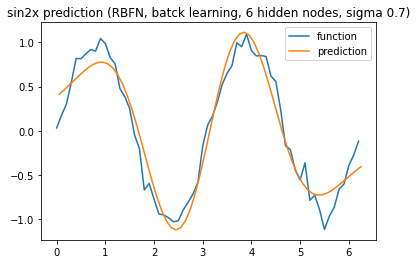

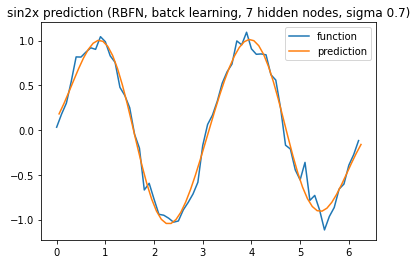

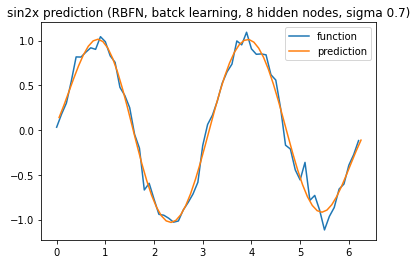

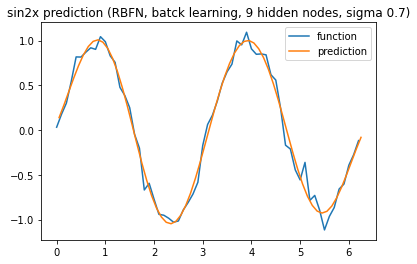

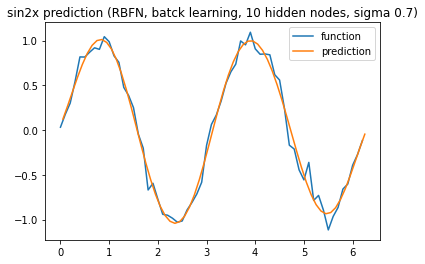

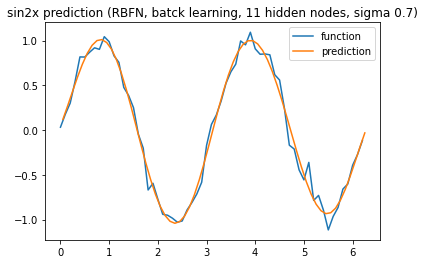

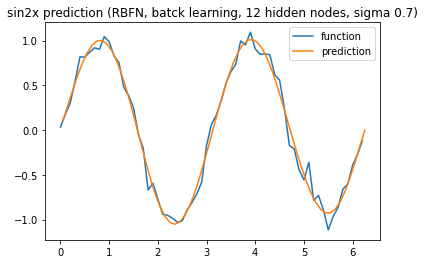

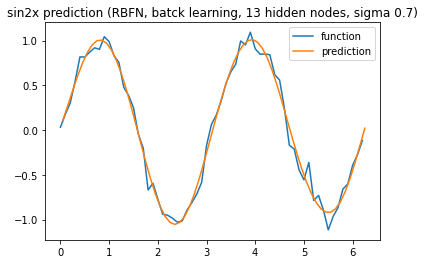

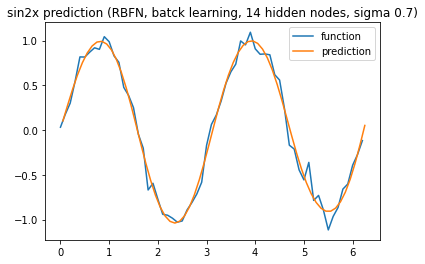

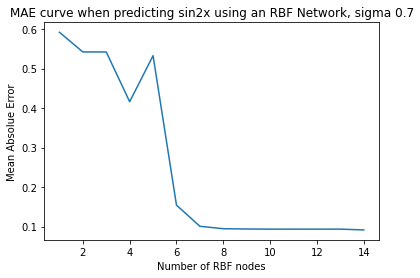

In [201]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

hidden_nodes = [i for i in range(1,15)]

mean_errors = []
for i in hidden_nodes:
    errors = []
    model = RBFNetwork(i, 0.7, 0.05)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_regression(test_patterns)
    #prediction = prediction.reshape(1,-1)[0]
    errors += [mean_absolute_error(prediction, test_targets)]
    
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, batck learning, " + str(i) + " hidden nodes, sigma 0.7)")
    mean_errors += [np.mean(errors)]
    
plot_error_curve(hidden_nodes, mean_errors, "Number of RBF nodes", "Mean Absolue Error", "MAE curve when predicting sin2x using an RBF Network, sigma 0.7")

**We will be using 13 hidden nodes from now on**

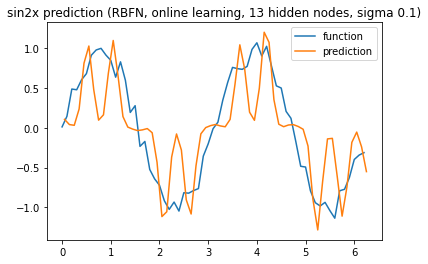

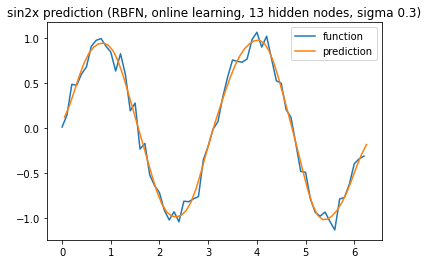

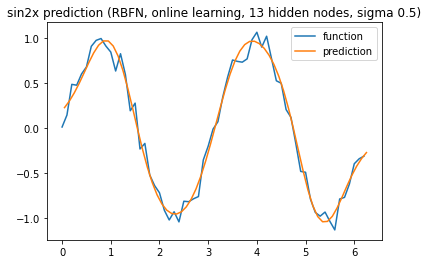

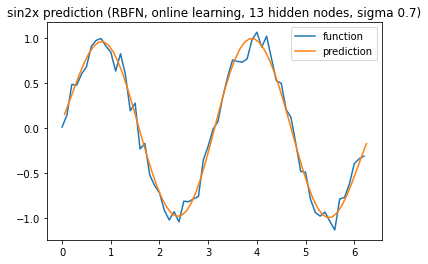

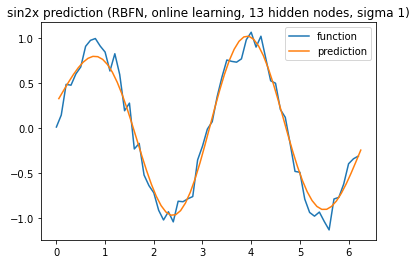

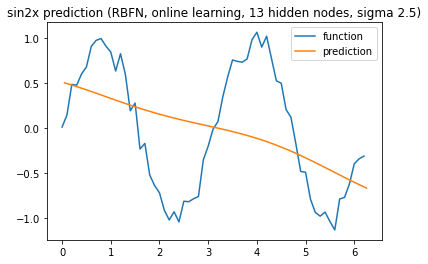

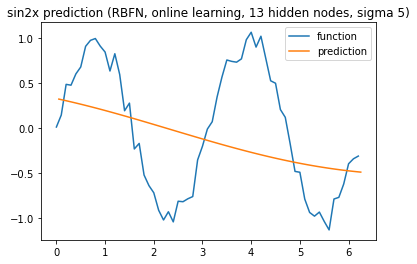

[0.344134094863686, 0.0911154659051474, 0.09634241562345618, 0.08908813967053084, 0.09877078579197622, 0.5714535734200756, 0.6443100823035911]


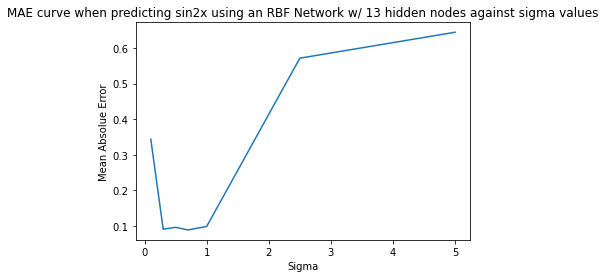

In [202]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

sigma = [0.1, 0.3, 0.5, 0.7, 1, 2.5, 5]
mean_errors = []
for i in sigma:
    errors = []
    for ii in range(10):
        model = RBFNetwork(13, i, 0.05)
        
        # Train for 50 epochs, shuffle
        idxs = [j for j in range(len(train_patterns))]
        for j in range(100):
            np.random.shuffle(idxs)
            for k in idxs:
                model.train_delta_rule(train_patterns[k], train_targets[k])
                
        prediction = model.predict_regression(test_patterns)
        prediction = prediction.reshape(1,-1)[0]
        errors += [mean_absolute_error(prediction, test_targets)]
    
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, 13 hidden nodes, sigma " + str(i) + ")")
    mean_errors += [np.mean(errors)]
    
print(mean_errors)
plot_error_curve(sigma, mean_errors, "Sigma", "Mean Absolue Error", "MAE curve when predicting sin2x using an RBF Network w/ 13 hidden nodes against sigma values")

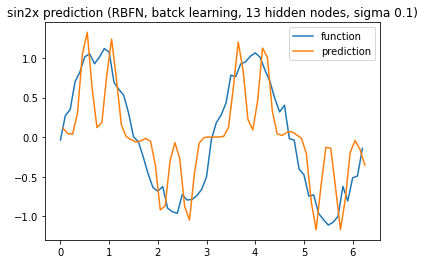

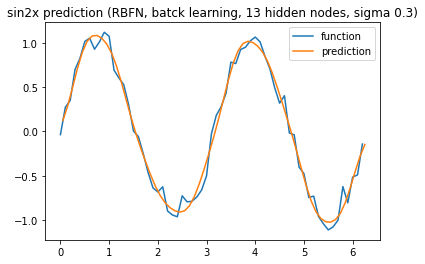

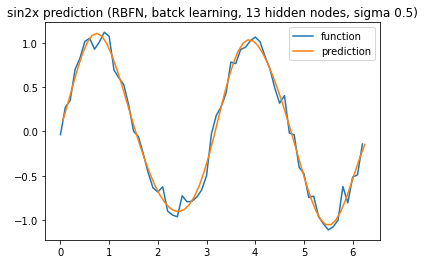

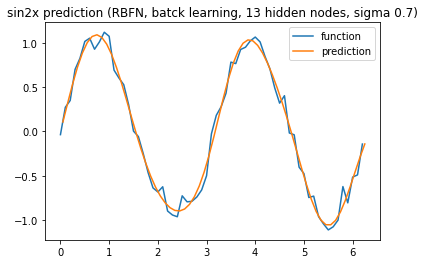

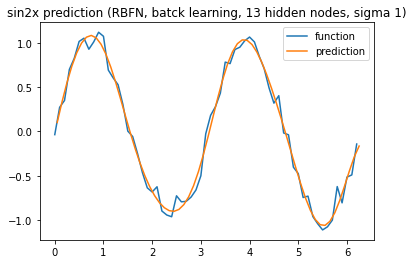

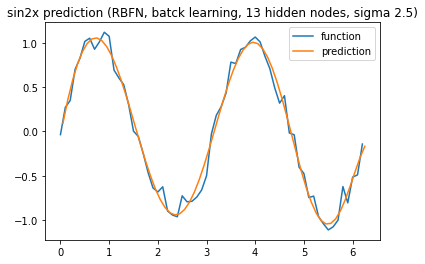

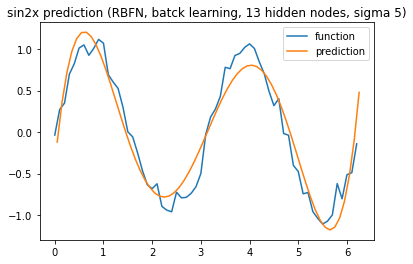

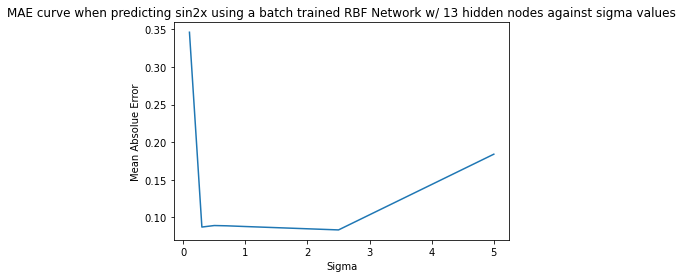

In [196]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

sigma = [0.1, 0.3, 0.5, 0.7, 1, 2.5, 5]
mean_errors = []
for i in sigma:
    errors = []
    model = RBFNetwork(13, i)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_regression(test_patterns)
    #prediction = prediction.reshape(1,-1)[0]
    errors += [mean_absolute_error(prediction, test_targets)]
    
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, batck learning, 13 hidden nodes, sigma " + str(i) + ")")
    mean_errors += [np.mean(errors)]
    
plot_error_curve(sigma, mean_errors, "Sigma", "Mean Absolue Error", "MAE curve when predicting sin2x using a batch trained RBF Network w/ 13 hidden nodes against sigma values")

**We will be using sigma=0.7 from now on**

**What can you say about the rate of convergence and its dependence on the learning rate, eta, for the two learning schemes?**

- Least squares isn't affected because it's a closed form solution, there are no iterations.

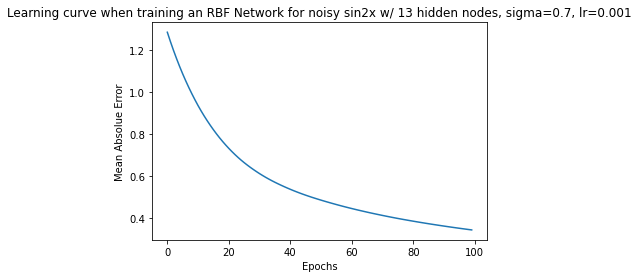

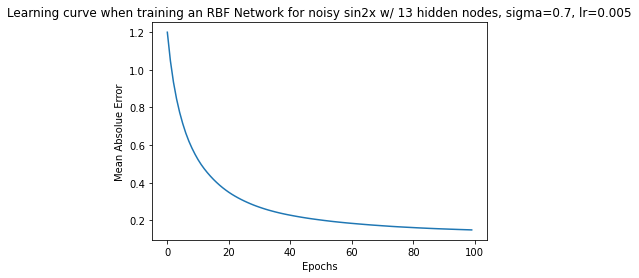

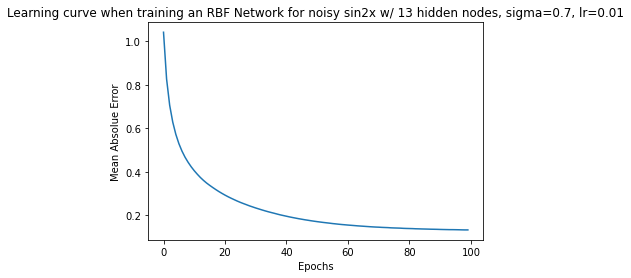

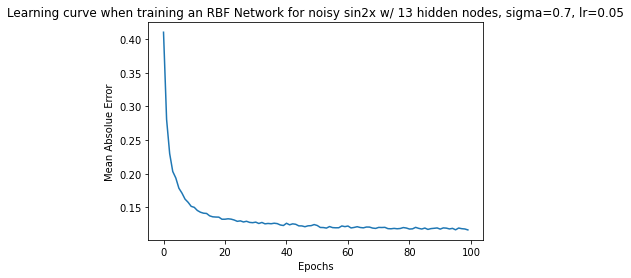

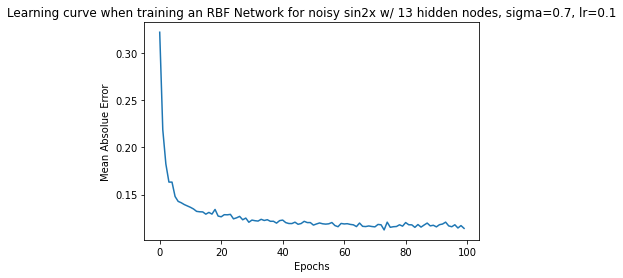

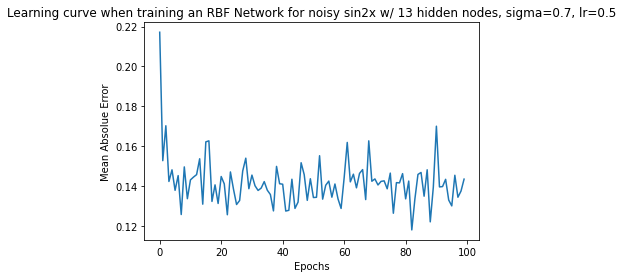

In [19]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

i = 13
s = 0.7
lrs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
for ii, lr in enumerate(lrs):
    e = 10
    iteration_errors = np.ndarray(shape=(e, 100))
    for ee in range(e):
        errors = []
        model = RBFNetwork(i, s, lr)
        idxs = [j for j in range(len(train_patterns))]
        epochs = [j for j in range(100)]
        for j in epochs:
            np.random.shuffle(idxs)

            # Train everything
            for k in idxs:
                model.train_delta_rule(train_patterns[k], train_targets[k])

            prediction = model.predict_regression(test_patterns)
            prediction = prediction.reshape(1,-1)[0]
            errors += [mean_absolute_error(prediction, test_targets)]
    
        iteration_errors[ee, :] = errors
    
    mean_errors = [np.mean(iteration_errors[:, i]) for i in range(100)]

    plot_error_curve(epochs, mean_errors, "Epochs", "Mean Absolue Error", "Learning curve when training an RBF Network for noisy sin2x w/ 13 hidden nodes, sigma=0.7, lr=" + str(lr))

**We will be using lr=0.05 from now on**

**What are the main effects of changing the width of RBFs?**

- Don't know how to study this further than what is already done

**How important is the positioning of the RBF nodes in the input space?**

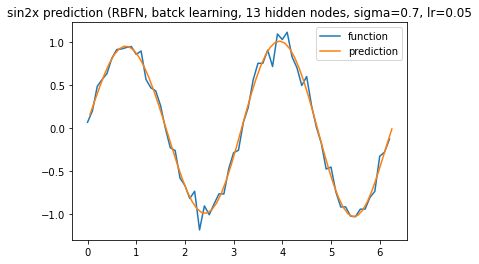

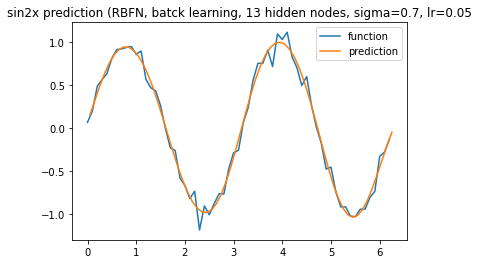

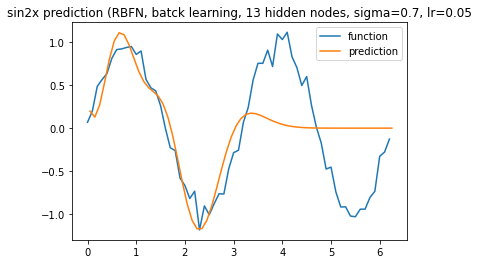

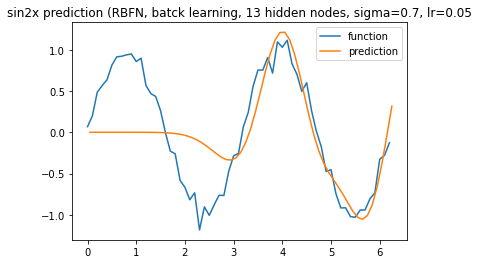

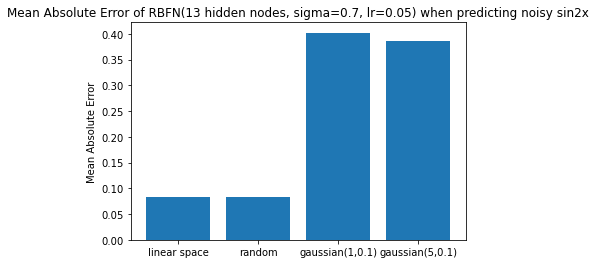

In [8]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets += noise

centers = [np.linspace(0, 2*np.pi, 13),
           np.random.rand(13, 1)*(2*np.pi),
           np.random.normal(1, 0.1, (13)),
           np.random.normal(5, 0.1, (13))]
mean_errors = []
for center in centers:
    errors = []
    model = RBFNetwork(13, 0.7, 0.05, center)
    model.train_least_squares(train_patterns, train_targets)
    prediction = model.predict_regression(test_patterns)
    #prediction = prediction.reshape(1,-1)[0]
    errors += [mean_absolute_error(prediction, test_targets)]
    
    plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, batck learning, 13 hidden nodes, sigma=0.7, lr=0.05")
    mean_errors += [np.mean(errors)]

plt.bar([i for i in range(len(centers))], mean_errors, tick_label=["linear space", "random", "gaussian(1,0.1)", "gaussian(5,0.1)"])
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error of RBFN(13 hidden nodes, sigma=0.7, lr=0.05) when predicting noisy sin2x")
plt.show()

**Test performance on the original clean data (train with noise, predict without)**

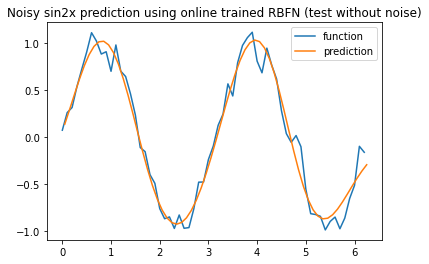

0.7968604110336808


In [25]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns] 

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise

model = RBFNetwork()
# Train for 100 epochs, shuffle
idxs = [j for j in range(len(train_patterns))]
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model.predict_regression(test_patterns)
errors += [mean_absolute_error(prediction, test_targets)]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "Noisy sin2x prediction using online trained RBFN (test without noise)")
print(mean_absolute_error(prediction, test_targets))

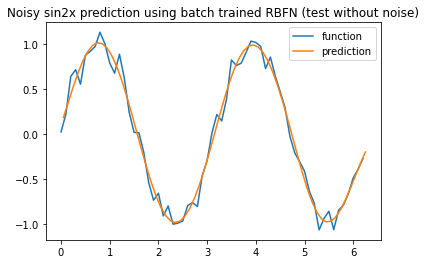

0.022876673972787274


In [26]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns] 

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise

model = RBFNetwork()
model.train_least_squares(train_patterns, train_targets)
prediction = model.predict_regression(test_patterns)
errors += [mean_absolute_error(prediction, test_targets)]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "Noisy sin2x prediction using batch trained RBFN (test without noise)")
print(mean_absolute_error(prediction, test_targets))

**Compare optimal RBFN in batch mode with first lab network**

In [27]:
class TwoLayerPerceptron:
    
    def __init__(self, input_dims, output_dims, num_hidden_nodes=5, alpha=0.9, learning_rate=0.001):
        self.hidden_nodes = num_hidden_nodes
        self.w = np.random.normal(0,1,(num_hidden_nodes, input_dims+1))
        self.v = np.random.normal(0,1,(output_dims,self.hidden_nodes+1))
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.dw = 0
        self.dv = 0
        
    def backprop(self, data, targets):
        # Forward pass
        ones = np.ones((1, data.shape[1]))
        data = np.concatenate((data, ones), axis=0)
        
        hin = np.dot(self.w, data)
        hout = 2 / (1 + np.exp(-hin)) - 1
        ones = np.ones((1, hout.shape[1]))
        hout = np.concatenate((hout, ones), axis=0)
            
        oin = np.dot(self.v, hout)
        out = 2 / (1 + np.exp(-oin)) - 1

        # Backward pass
        delta_o = (out - targets) * ((1 + out) *  (1 - out)) * 0.5
        delta_h = (np.dot(np.transpose(self.v),delta_o)) * ((1 + hout) * (1 - hout)) * 0.5
        delta_h = delta_h[:self.hidden_nodes,:]
        
        # Weight update
        self.dw = (self.dw * self.alpha) - np.dot(delta_h, np.transpose(data)) * (1 - self.alpha)
        self.dv = (self.dv * self.alpha) - np.dot(delta_o, np.transpose(hout)) * (1 - self.alpha)
        self.w = self.w + self.dw * self.learning_rate
        self.v = self.v + self.dv * self.learning_rate
        
    def train(self, data, targets, sequential=False, epochs=100):
        for epoch in range(epochs):
            if not sequential:
                self.backprop(data, targets)
            else:
                for sample in range(data.shape[1]):
                    singleData = np.reshape(data[:, sample], (data.shape[0], 1))
                    self.backprop(singleData, [targets[sample]])

            
    def predict(self, data):
        ones = np.ones((1, data.shape[1]))
        data = np.concatenate((data, ones), axis=0)
        
        hin = np.dot(self.w, data)
        hout = 2 / (1 + np.exp(-hin)) - 1
        ones = np.ones((1, hout.shape[1]))
        hout = np.concatenate((hout, ones), axis=0)
            
        oin = np.dot(self.v, hout)
        out = 2 / (1 + np.exp(-oin)) - 1
        return out

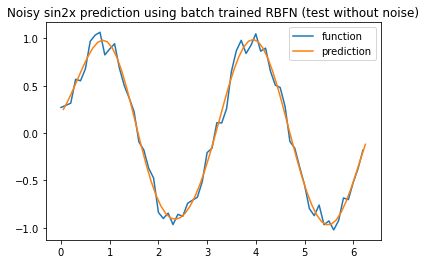

0.04001728701167332


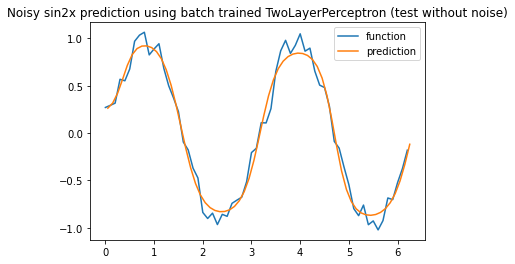

0.07392471434021192


In [28]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns] 

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets += noise

model = RBFNetwork()
model.train_least_squares(train_patterns, train_targets)
prediction = model.predict_regression(test_patterns)
errors += [mean_absolute_error(prediction, test_targets)]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "Noisy sin2x prediction using batch trained RBFN (test without noise)")
print(mean_absolute_error(prediction, test_targets))

model = TwoLayerPerceptron(1, 1, num_hidden_nodes=14, learning_rate=0.05)
model.train(train_patterns.reshape(1,-1), train_targets, epochs=10000)
prediction = model.predict(test_patterns.reshape(1,-1))[0]
errors += [mean_absolute_error(prediction, test_targets)]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "Noisy sin2x prediction using batch trained TwoLayerPerceptron (test without noise)")
print(mean_absolute_error(prediction, test_targets))

## Competitive learning (CL) to initialise RBF units

In [64]:
def plot_rbf_centers(centers, xlabel, ylabel, title):
    node_number = np.array([i for i in range(1, len(centers)+1)])
    print(centers.shape)
    print(node_number.shape)
    plt.scatter(node_number, centers)
    plt.axis([0, 14, 0, 6])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

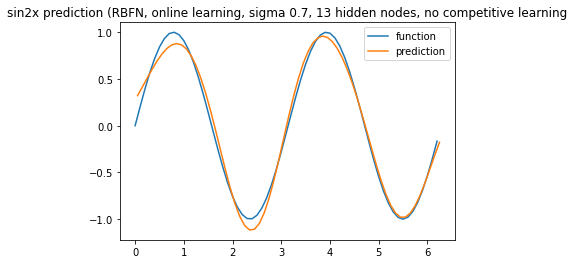

mae  0.06236494689043516
[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653
 6.28318531]
(13,)
(13,)


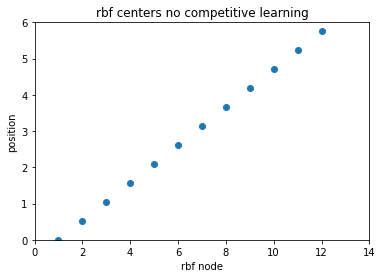

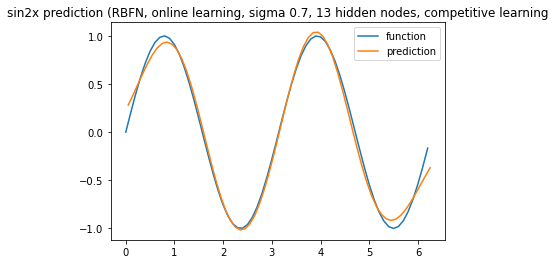

mae  0.0515915367950778
[0.11112035 0.5614396  1.10538938 1.59916578 2.08686582 2.61993711
 3.23593509 3.71429318 4.16598645 4.7540213  5.31977217 5.77221087
 6.14186719]
(13,)
(13,)


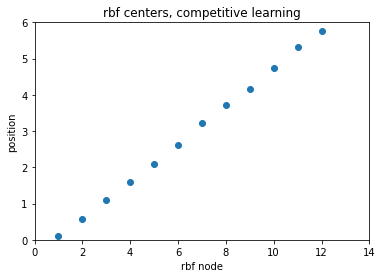

In [65]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets_noise = train_targets + noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets_noise = test_targets + noise

model = RBFNetwork(13, 0.7, 0.05)

idxs = [j for j in range(len(train_patterns))]

#50 epochs
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model.centers)
plot_rbf_centers(model.centers, "rbf node", "position","rbf centers no competitive learning")

model2 = RBFNetwork(13, 0.7, 0.05)
model2.competitive_learning(train_patterns)
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model2.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model2.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, competitive learning")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model2.centers)
plot_rbf_centers(model2.centers, "rbf node", "position","rbf centers, competitive learning")

CL for noisy data:

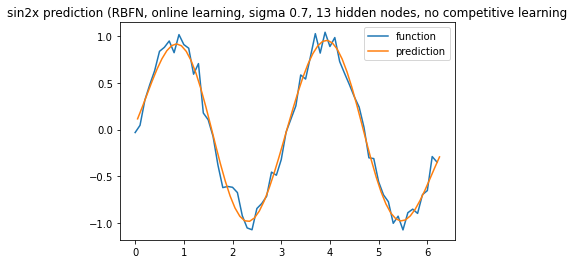

mae  0.0968253263965072
[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653
 6.28318531]
(13,)
(13,)


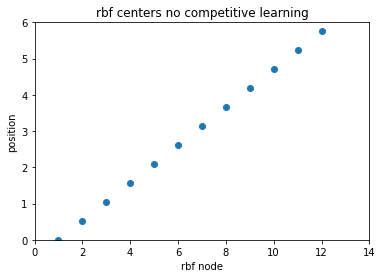

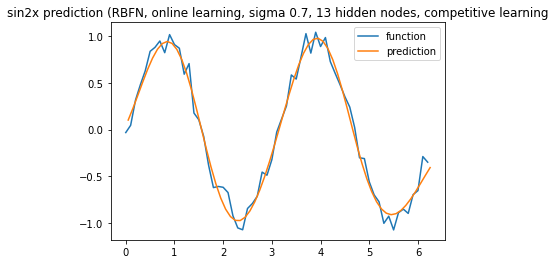

mae  0.10325767539151749
[0.08558275 0.4684079  0.96655879 1.5601251  2.05773951 2.58191149
 3.12476038 3.6452265  4.18964363 4.73302801 5.19103767 5.65343316
 6.08814571]
(13,)
(13,)


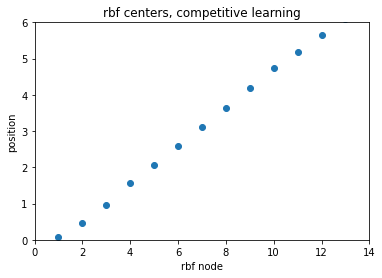

In [66]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets = train_targets + noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets = test_targets + noise

model = RBFNetwork(13, 0.7, 0.05)

idxs = [j for j in range(len(train_patterns))]

#50 epochs
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model.centers)
plot_rbf_centers(model.centers, "rbf node", "position","rbf centers no competitive learning")

model2 = RBFNetwork(13, 0.7, 0.05)
model2.competitive_learning(train_patterns)
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model2.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model2.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, competitive learning")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model2.centers)
plot_rbf_centers(model2.centers, "rbf node", "position","rbf centers, competitive learning")

random center placement:

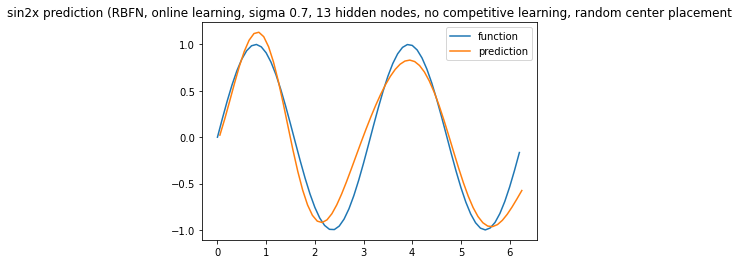

mae  0.14224006138943224
[[4.34037866]
 [4.82325955]
 [0.68070978]
 [5.41604555]
 [1.07334703]
 [0.68094836]
 [3.86555519]
 [0.74249114]
 [1.70194208]
 [3.74705348]
 [5.39623675]
 [0.08925908]
 [1.57923416]]
(13,)
(13,)


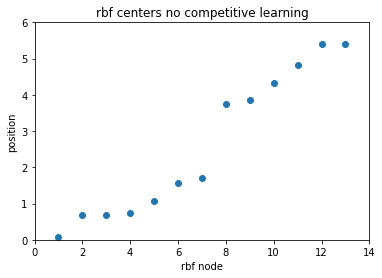

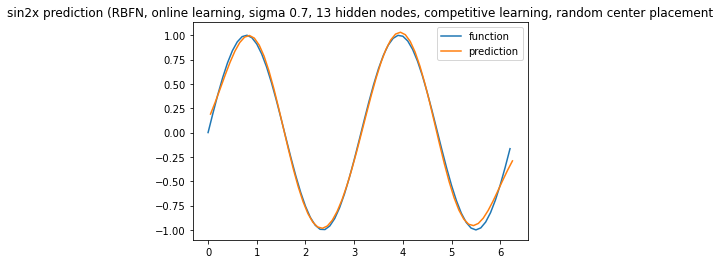

mae  0.032469460672450795
[[4.28595736]
 [4.79699545]
 [0.50055513]
 [5.91832756]
 [1.19109205]
 [0.69070899]
 [3.70343936]
 [0.85659103]
 [2.25799252]
 [3.07076804]
 [5.31152302]
 [0.1203301 ]
 [1.66882097]]
(13,)
(13,)


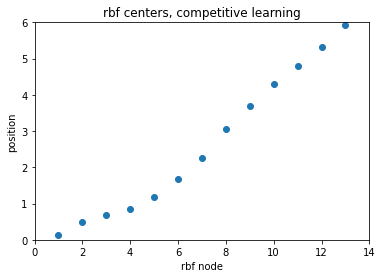

In [71]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets_noise = train_targets + noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets_noise = test_targets + noise

centers = np.random.rand(13,1)*(2*np.pi)

model = RBFNetwork(13, 0.7, 0.05, centers)

idxs = [j for j in range(len(train_patterns))]

#50 epochs
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model.centers)
plot_rbf_centers(np.sort(model.centers[:,0]), "rbf node", "position","rbf centers no competitive learning")

model2 = RBFNetwork(13, 0.7, 0.05, centers)
model2.competitive_learning(train_patterns)
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model2.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model2.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model2.centers)
plot_rbf_centers(np.sort(model2.centers[:,0]), "rbf node", "position","rbf centers, competitive learning")

avoid dead units:

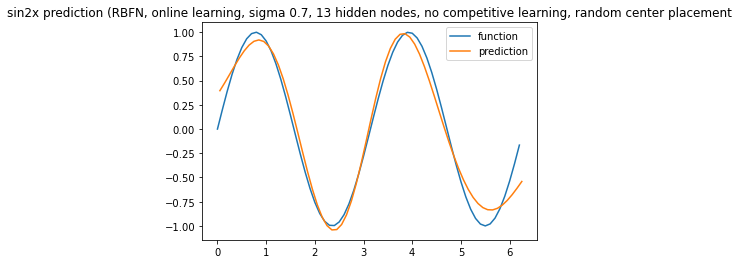

mae  0.09918629134258948
[[1.64798087]
 [1.86087156]
 [1.04986511]
 [4.85932757]
 [1.88750175]
 [3.04754657]
 [3.41762195]
 [1.17272322]
 [5.84770942]
 [1.10067083]
 [2.46533804]
 [5.56940941]
 [3.563298  ]]
(13,)
(13,)


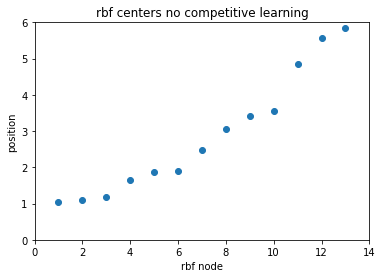

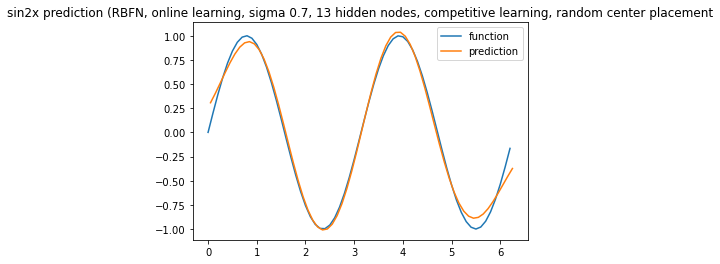

mae  0.04961203674975649
[[1.54025228]
 [2.20998397]
 [0.41926818]
 [5.46017478]
 [2.43833631]
 [3.77886099]
 [3.97198657]
 [0.9365835 ]
 [5.79712871]
 [0.83733014]
 [3.06379724]
 [5.56980973]
 [4.47151234]]
(13,)
(13,)


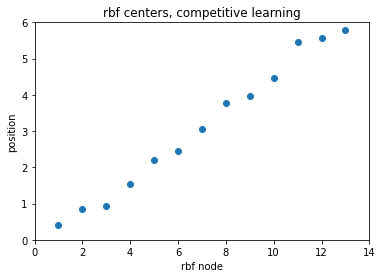

In [79]:
train_targets = [np.sin(2*x) for x in train_patterns]
test_targets = [np.sin(2*x) for x in test_patterns]

noise = np.random.normal(0, 0.1, (len(train_targets)))
train_targets_noise = train_targets + noise
noise = np.random.normal(0, 0.1, (len(test_targets)))
test_targets_noise = test_targets + noise

centers = np.random.rand(13,1)*(2*np.pi)

model = RBFNetwork(13, 0.7, 0.05, centers)

idxs = [j for j in range(len(train_patterns))]

#50 epochs
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model.centers)
plot_rbf_centers(np.sort(model.centers[:,0]), "rbf node", "position","rbf centers no competitive learning")

model2 = RBFNetwork(13, 0.7, 0.05, centers)
model2.competitive_learning(train_patterns, avoid_dead_units=True)
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model2.train_delta_rule(train_patterns[k], train_targets[k])
prediction = model2.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model2.centers)
plot_rbf_centers(np.sort(model2.centers[:,0]), "rbf node", "position","rbf centers, competitive learning")

Two dimensional RBF model

In [184]:
class RBFNetwork2D:
    
    def __init__(self, num_hidden_nodes=13, sigma = 0.7, learning_rate=0.05):
        self.hidden_nodes = num_hidden_nodes
        self.w = np.random.normal(0, 1, (num_hidden_nodes, 2))
        
        self.centers = np.transpose(([np.linspace(0,1,13), np.linspace(0,1,13)]))
        self.sigma = sigma
        self.lr = learning_rate
        
    def transfer_function(self, data):
        phi = np.zeros((data.shape[0], self.hidden_nodes))
        for i in range(data.shape[0]):
            for j in range(self.hidden_nodes):
                phi[i, j] = np.sum(np.exp(-(data[i] - self.centers[j])**2 / (2 * self.sigma ** 2)))
        
        return phi
        
    def train_least_squares(self, data, targets):
        phi = self.transfer_function(data)
        self.w = np.linalg.solve(phi.T @ phi, phi.T @ targets)
        
    def train_delta_rule(self, data, target):
        phi = np.zeros((1, self.hidden_nodes))
        for j in range(self.hidden_nodes):
            phi[0,j] = np.sum(np.exp(-(data - self.centers[j])**2 / (2 * self.sigma ** 2)))

        prediction = self.predict_regression([data])[0][0]
        error = target - prediction
        self.w += self.lr * error * phi
        
    def competitive_learning(self, data, epochs=1000, avoid_dead_units=False):
        for i in range(epochs):
            point = data[:,np.random.randint(0, len(data))]
            distance = np.zeros((self.hidden_nodes, 1))
            for j in range(self.hidden_nodes):
                distance = np.linalg.norm(self.centers[:,j], point)
                
            winner = np.argmin(distance)
            self.centers[:,winner] += self.lr * (point - self.centers[:,winner])
            if avoid_dead_units:
                winners = np.argsort(distance, axis=0)
                for winner in winners[:3]:
                    self.centers[winner] += self.lr*(point - self.centers[:,winner])
        
    def predict_regression(self, data):
        phi = self.transfer_function(data)
        return phi @ self.w
    
    def predict_classify(self, data):
        phi = self.transfer_function(data)
        result = phi @ self.w
        result = [1 if x >= 0 else -1 for x in result]
        return result

(100, 2)
0.11529565643768476


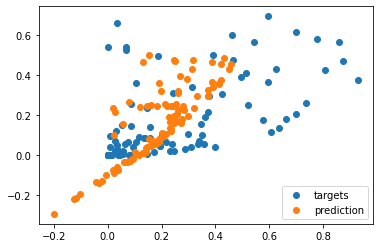

'\nidxs = [j for j in range(len(train_patterns))]\nfor j in range(100):\n    np.random.shuffle(idxs)\n    for k in idxs:\n        model.train_delta_rule(train_patterns[k,:], train_targets[k,:], competitive=False)\nprediction = model.predict_regression(test_patterns)\nprediction = prediction.reshape(1,-1)[0]\nplot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning, random center placement")\nprint("mae ", mean_absolute_error(prediction, test_targets))\nprint(model.centers)\nplot_rbf_centers(model.centers, "rbf node", "position","rbf centers no competitive learning")\n\nmodel2 = RBFNetwork(13, 0.7, 0.05, centers)\nmodel2.competitive_learning(train_patterns)\nfor j in range(100):\n    np.random.shuffle(idxs)\n    for k in idxs:\n        model2.train_delta_rule(train_patterns[k,:], train_targets[k,:], competitive=True)\nprediction = model2.predict_regression(test_pattern

In [185]:
## 2D data

train_data = np.loadtxt("ballist.dat")
test_data = np.loadtxt("balltest.dat")
train_patterns = train_data[:,:2]
train_targets = train_data[:,2:4]
test_patterns = test_data[:,:2]
test_targets = test_data[:,2:4]


model = RBFNetwork2D(13, 0.7, 0.05)

model.train_least_squares(train_patterns, train_targets)
prediction = model.predict_regression(test_patterns)
print(prediction.shape)
print(mean_absolute_error(prediction, test_targets))

plt.scatter(test_targets[:,0], test_targets[:,1], label="targets")
plt.scatter(prediction[:,0], prediction[:,1], label="prediction")
plt.legend()
plt.show()
"""
idxs = [j for j in range(len(train_patterns))]
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model.train_delta_rule(train_patterns[k,:], train_targets[k,:], competitive=False)
prediction = model.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, no competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model.centers)
plot_rbf_centers(model.centers, "rbf node", "position","rbf centers no competitive learning")

model2 = RBFNetwork(13, 0.7, 0.05, centers)
model2.competitive_learning(train_patterns)
for j in range(100):
    np.random.shuffle(idxs)
    for k in idxs:
        model2.train_delta_rule(train_patterns[k,:], train_targets[k,:], competitive=True)
prediction = model2.predict_regression(test_patterns)
prediction = prediction.reshape(1,-1)[0]
plot_function_prediction(train_patterns, train_targets, test_patterns, prediction, "sin2x prediction (RBFN, online learning, sigma 0.7, 13 hidden nodes, competitive learning, random center placement")
print("mae ", mean_absolute_error(prediction, test_targets))
print(model2.centers)
plot_rbf_centers(model2.centers, "rbf node", "position","rbf centers, competitive learning")
"""